In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

Required packages

In [2]:
data_income = pd.read_csv("D:\\notebooks\income.csv")   

Importing data

In [3]:
data = data_income.copy()

Creating a copy of original data 

 =============================================================================

 =============================================================================<br>
**Exploratory data analysis:**<br><br>
1. Getting to know the data<br>
2. Data preprocessing (Missing values)<br>
3. Cross tables and data visualization

 =============================================================================

 =============================================================================<br>

**1. Getting to know the data**

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


To check variables' data type

In [5]:
data.isnull() 

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


Check for missing values 

In [7]:
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


Summary of numerical variables

In [8]:
summary_cate = data.describe(include = "O")
print(summary_cate)

         JobType    EdType  ...   nativecountry                        SalStat
count      31978     31978  ...           31978                          31978
unique         9        16  ...              41                              2
top      Private   HS-grad  ...   United-States   less than or equal to 50,000
freq       22286     10368  ...           29170                          24283

[4 rows x 9 columns]


Summary of categorical variables

In [9]:
data['JobType'].value_counts()
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

Frequency of each categories

In [10]:
print(np.unique(data['JobType'])) 
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


Checking for unique classes <br>
Note:<br>
There exists ' ?' instesd of nan

**2. Data preprocessing (Missing values)**

In [11]:
data = pd.read_csv("D:\\notebooks\income.csv",
                   na_values=[" ?"]) 

Read the data by including "na_values[' ?']" to consider ' ?' as nan

In [12]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [17]:
missing = data[data.isnull().any(axis=1)]

axis=1 => to consider at least one column value is missing in a row

**Points to note:**
1. Missing values in Jobtype    = 1809
2. Missing values in Occupation = 1816 
3. There are 1809 rows where two specific 
   columns i.e. occupation & JobType have missing values
4. (1816-1809) = 7 => You still have occupation unfilled for 
   these 7 rows. Because, jobtype is Never worked


In [13]:
data2 = data.dropna(axis=0)
data3 = data2.copy()
data4 = data3.copy()

In [16]:
correlation = data2.corr(numeric_only=True)

Relationship between independent variables

In [17]:
data2.columns  

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

Extracting the column names

In [18]:
gender = pd.crosstab(index = data2["gender"],
                     columns  = 'count',
                     normalize = True)
round(gender*100,1)

col_0,count
gender,
Female,32.4
Male,67.6


In [19]:
gender_salstat = pd.crosstab(index = data2["gender"],
                             columns = data2['SalStat'],
                             margins = True,
                             normalize =  'index')                  
round(gender_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,11.4,88.6
Male,31.4,68.6
All,24.9,75.1


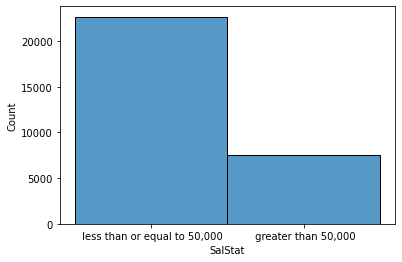

In [20]:
SalStat = sns.histplot(data2['SalStat'])

Note:<br>   75 % of people's salary status is <=50,000<br> 
        25% of people's salary status is > 50,000

<Axes: xlabel='age', ylabel='Count'>

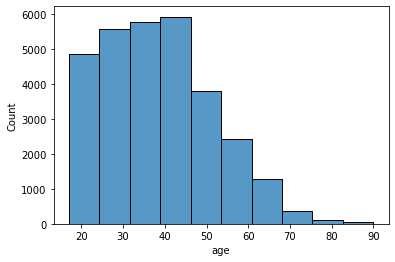

In [21]:
sns.histplot(data2['age'], bins=10, kde=False)

Note:<br>People with age 20-45 age are high in frequency

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

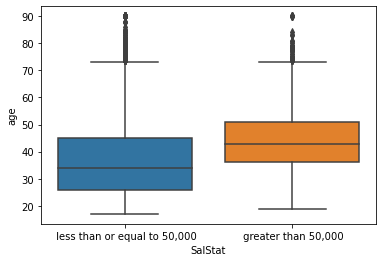

In [22]:
sns.boxplot(x = 'SalStat',y = 'age', data=data2)
data2.groupby('SalStat')['age'].median()

Note: <br>
people with 35-50 age are more likely to earn > 50000 USD p.a<br>
people with 25-35 age are more likely to earn <= 50000 USD p.a

In [23]:
job_salstat =pd.crosstab(index = data2["JobType"],
                         columns = data2['SalStat'],
                         margins = True,
                         normalize =  'index')
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


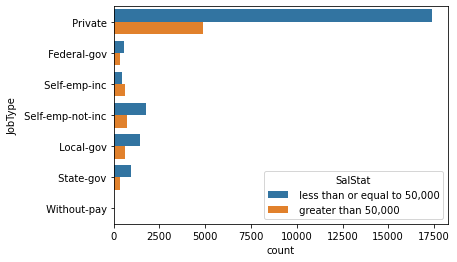

In [24]:
JobType     = sns.countplot(y=data2['JobType'],
                            hue = 'SalStat',
                            data=data2)

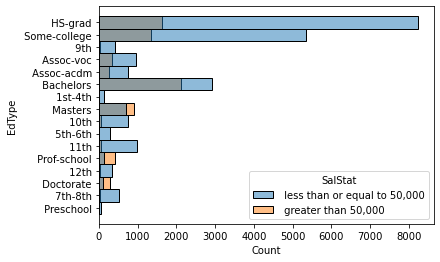

In [27]:
Education   = sns.histplot(y =data2['EdType'],
                           hue = 'SalStat',
                           data=data2)

In [28]:
EdType_salstat = pd.crosstab(index = data2["EdType"],
                             columns = data2['SalStat'],
                             margins = True,
                             normalize ='index')  
round(EdType_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


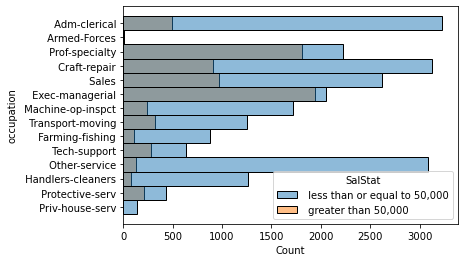

In [30]:
Occupation  = sns.histplot(y=data2['occupation'],hue = 'SalStat', data=data2)

In [31]:
occ_salstat = pd.crosstab(index = data2["occupation"],
                          columns =data2['SalStat'],
                          margins = True,
                          normalize = 'index')  
round(occ_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


<Axes: xlabel='capitalgain', ylabel='Count'>

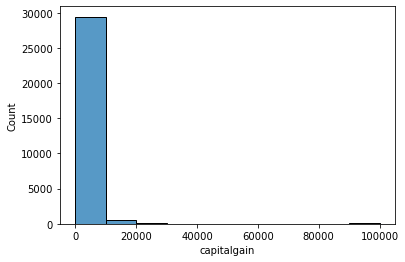

In [32]:
sns.histplot(data2['capitalgain'], bins = 10, kde = False)

<Axes: xlabel='capitalloss', ylabel='Count'>

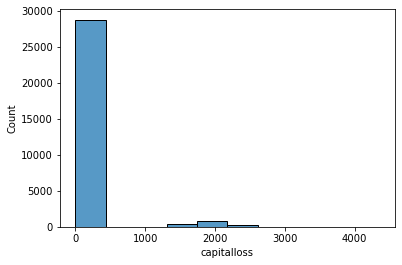

In [33]:
sns.histplot(data2['capitalloss'], bins = 10, kde = False)